# BibRec: Data Normalization

## Basic Data Cleaning

In [1]:
from bibrec.server.Utils import *
import seaborn as sns

In [2]:
books = get_books(books_path='data/BX-Books.csv')
users = get_users(users_path='data/BX-Users.csv')
ratings = get_ratings(books, ratings_path='data/BX-Book-Ratings.csv', explicit_only=False)

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:35: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1", index_col=False)
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:120: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


### Books

In [ ]:
Basic cleaning of the books dataset includes:
- Sanitization of column names
- Filtering out books with invalid or duplicate isbn
- _isbn_: Converting the ISBN to uppercase
- _isbn13_: Additionally converting the ISBN to the [ISBN-13 Standard](https://www.isbn.org/about_ISBN_standard)
- _year_of_publication_: Sanitizing the publication Year
    - Replacing publication dates in the future (past 2005) to the average publication date
    - Removing books with no publication date
    - Converting to an integer



In [3]:
books

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215
...,...,...,...,...,...,...,...,...,...
270939,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095
270940,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763
270941,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671
270942,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270944 entries, 0 to 270943
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 270944 non-null  object
 1   book_title           270944 non-null  object
 2   book_author          270943 non-null  object
 3   year_of_publication  270944 non-null  int16 
 4   publisher            270942 non-null  object
 5   image_url_s          270944 non-null  object
 6   image_url_m          270944 non-null  object
 7   image_url_l          270944 non-null  object
 8   isbn13               270944 non-null  object
dtypes: int16(1), object(8)
memory usage: 17.1+ MB


In [5]:
books.describe()

,year_of_publication
count,270944.000000
mean,1993.114920
std,9.320961
min,1376.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2005.000000


<AxesSubplot: >

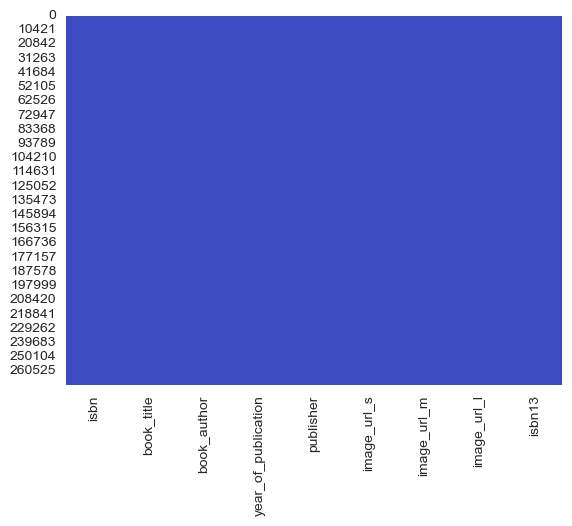

In [6]:
sns.heatmap(books.isnull(), cbar = False, cmap='coolwarm')

### Users

Basic cleaning of the users dataset includes:
- Sanitization of column names
- _age_: Replacing invalid ages (not in between 6 and 110) with the average age
- Splitting the _Location_ into _country_, _state_ and _city_ and replacing invalid values

In [7]:
users

,user_id,age,city,state,country
0,1,40.426834,nyc,new york,usa
1,2,18.000000,stockton,california,usa
2,3,49.107409,moscow,yukon territory,russia
3,4,17.000000,porto,v.n.gaia,portugal
4,5,48.215585,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,72.255167,portland,oregon,usa
278854,278855,50.000000,tacoma,washington,united kingdom
278855,278856,31.651969,brampton,ontario,canada
278856,278857,19.801983,knoxville,tennessee,usa


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  278858 non-null  int64  
 1   age      278858 non-null  float64
 2   city     278736 non-null  object 
 3   state    278605 non-null  object 
 4   country  274295 non-null  string 
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 10.6+ MB


In [9]:
users.describe()

,user_id,age
count,278858.00000,278858.000000
mean,139429.50000,34.866821
std,80499.51502,13.854815
min,1.00000,0.003441
25%,69715.25000,24.806854
50%,139429.50000,33.000000
75%,209143.75000,44.000000
max,278858.00000,110.000000


<AxesSubplot: >

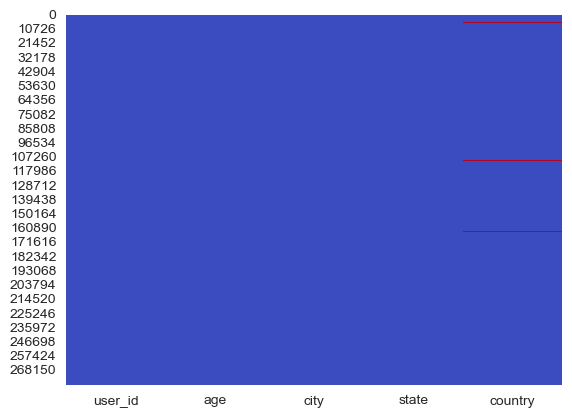

In [10]:
sns.heatmap(users.isnull(), cbar = False, cmap='coolwarm')

### Ratings

Basic cleaning of the ratings dataset includes:
- Sanitization of column names
- Filtering out ratings with non or invalid ISBN
- Filtering out ratings for unknown books
- _isbn_: Converting the ISBN to uppercase
- _isbn13_: Additionally converting the ISBN to the [ISBN-13 Standard](https://www.isbn.org/about_ISBN_standard)


In [11]:
ratings

,user_id,isbn,book_rating,isbn13
0,276725,034545104X,0,9780345451040
1,276726,0155061224,5,9780155061224
2,276727,0446520802,0,9780446520805
3,276729,052165615X,3,9780521656153
4,276729,0521795028,6,9780521795029
...,...,...,...,...
1149774,276704,0876044011,0,978087604401
1149775,276704,1563526298,9,9781563526299
1149776,276706,0679447156,0,9780679447153
1149777,276709,0515107662,10,9780515107661


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031387 entries, 0 to 1149778
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1031387 non-null  int64 
 1   isbn         1031387 non-null  object
 2   book_rating  1031387 non-null  int64 
 3   isbn13       1031387 non-null  object
dtypes: int64(2), object(2)
memory usage: 39.3+ MB


In [13]:
ratings.describe()

,user_id,book_rating
count,1.031387e+06,1.031387e+06
mean,1.405968e+05,2.839253e+00
std,8.052512e+04,3.854219e+00
min,2.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00
50%,1.412100e+05,0.000000e+00
75%,2.114260e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


<AxesSubplot: >

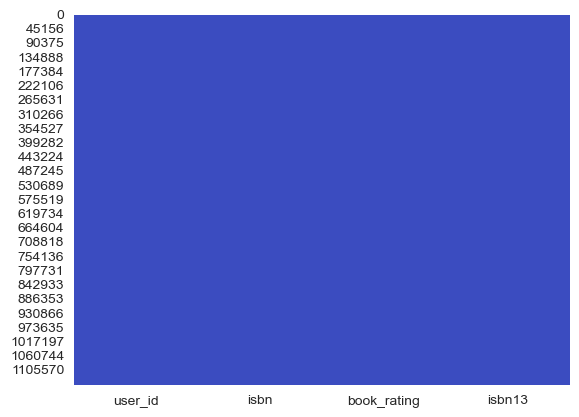

In [14]:
sns.heatmap(ratings.isnull(), cbar = False, cmap='coolwarm')

<AxesSubplot: xlabel='book_rating', ylabel='count'>

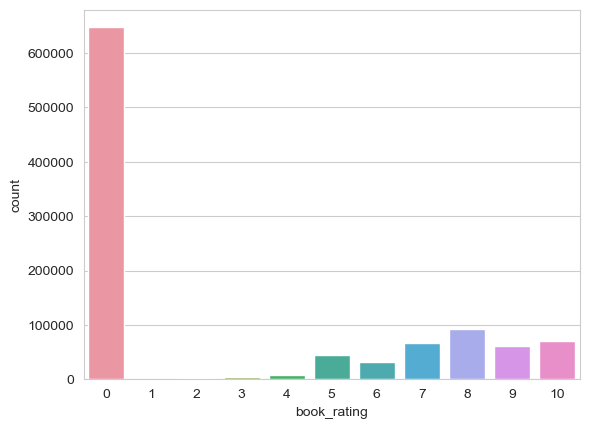

In [15]:
sns.countplot(x=ratings["book_rating"])

## Normalized Dataset
The cleaned dataset is saved to separate .CSV files for faster loading.

In [16]:
# load normalized csv files
norm_books, norm_users, norm_ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                                           users_path='data/normalized_users.csv',
                                                           ratings_path='data/normalized_ratings.csv')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:396: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(ratings_path, sep=",", encoding="utf-8", na_filter=False)


### Normalized Books
Normalizing books contains the following:
- Rating bias correction per user by adjusting the rating with the users average rating (_rating_count_, _rating_mean_)
- Publication Year normalization by offsetting with datasets publication year (2005)
- Publisher categorization into the top 20 publishers and "other"

In [17]:
norm_books

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,1.0,3
1,0002005018,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,4.928571,14.0,4
2,0060973129,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,5.000000,3.0,14
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,4.272727,11.0,6
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
270939,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,0525447644,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,1.0,1
270942,0192126040,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,1.0,9


In [18]:
norm_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270944 entries, 0 to 270943
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   isbn                            270944 non-null  object 
 1   book_title                      270944 non-null  object 
 2   book_author                     270944 non-null  object 
 3   year_of_publication             270944 non-null  int64  
 4   publisher                       270944 non-null  object 
 5   image_url_s                     270944 non-null  object 
 6   image_url_m                     270944 non-null  object 
 7   image_url_l                     270944 non-null  object 
 8   isbn13                          270944 non-null  int64  
 9   rating_mean                     270944 non-null  float64
 10  rating_count                    270944 non-null  float64
 11  normalized_year_of_publication  270944 non-null  int64  
dtypes: float64(2), i

In [19]:
norm_books.describe()

,year_of_publication,isbn13,rating_mean,rating_count,normalized_year_of_publication
count,270944.000000,2.709440e+05,270944.000000,270944.000000,270944.000000
mean,1993.114920,8.959982e+12,2.871698,3.806694,11.885080
std,9.320961,2.575736e+12,3.281596,13.805660,9.320961
min,1376.000000,9.782000e+03,0.000000,0.000000,0.000000
25%,1989.000000,9.780373e+12,0.000000,1.000000,5.000000
50%,1995.000000,9.780554e+12,1.800000,1.000000,10.000000
75%,2000.000000,9.780871e+12,5.000000,3.000000,16.000000
max,2005.000000,9.790000e+12,10.000000,2502.000000,629.000000


<AxesSubplot: >

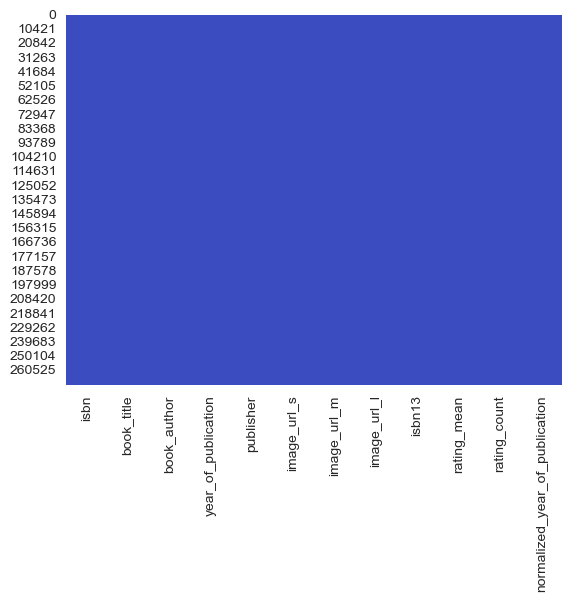

In [20]:
sns.heatmap(norm_books.isnull(), cbar = False, cmap='coolwarm')

### Normalized User
Normalizing users contains the following:
- Calculating the users average rating (_user_count_, _user_mean_)
- Country categorization into the top 20 countries and "other"
- State categorization into the top 20 states and "other"

In [21]:
norm_users

,user_id,age,city,state,country,user_mean,user_count
0,1,32.893940,nyc,new_york,usa,0.00,0.0
1,2,18.000000,stockton,california,usa,0.00,1.0
2,3,23.894738,moscow,other,other,0.00,0.0
3,4,17.000000,porto,other,portugal,0.00,0.0
4,5,34.774457,farnborough,other,united_kingdom,0.00,0.0
...,...,...,...,...,...,...,...
278853,278854,28.203240,portland,oregon,usa,5.25,8.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.00,0.0
278855,278856,40.689921,brampton,ontario,canada,0.00,0.0
278856,278857,34.861866,knoxville,other,usa,0.00,0.0


In [22]:
norm_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     278858 non-null  int64  
 1   age         278858 non-null  float64
 2   city        278858 non-null  object 
 3   state       278858 non-null  object 
 4   country     278858 non-null  object 
 5   user_mean   278858 non-null  float64
 6   user_count  278858 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 14.9+ MB


In [23]:
norm_users.describe()

,user_id,age,user_mean,user_count
count,278858.00000,278858.000000,278858.000000,278858.000000
mean,139429.50000,34.868217,1.451977,3.698610
std,80499.51502,13.836589,2.850048,51.265846
min,1.00000,0.000617,0.000000,0.000000
25%,69715.25000,24.789040,0.000000,0.000000
50%,139429.50000,33.000000,0.000000,0.000000
75%,209143.75000,44.000000,0.000000,1.000000
max,278858.00000,110.000000,10.000000,11152.000000


<AxesSubplot: >

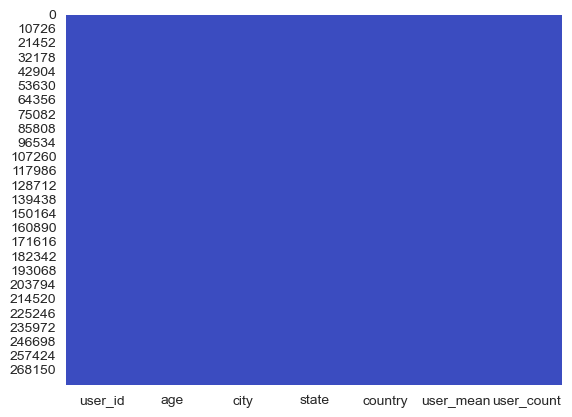

In [24]:
sns.heatmap(norm_users.isnull(), cbar = False, cmap='coolwarm')

### Normalized Ratings
Normalizing ratings contains the following:
- Removing implicit ratings
- Calculating the normalized_rating through the users average rating

In [25]:
norm_ratings

,user_id,isbn,book_rating,isbn13,normalized_rating
0,276726,0155061224,5,9780155061224,-1.5
1,276729,052165615X,3,9780521656153,0.0
2,276729,0521795028,6,9780521795029,4.0
3,276744,038550120X,7,9780385501200,2.0
4,276747,0060517794,9,9780060517793,4.6
...,...,...,...,...,...
383957,276704,0743211383,7,9780743211383,
383958,276704,0806917695,5,9780806917696,
383959,276704,1563526298,9,9781563526299,
383960,276709,0515107662,10,9780515107661,


In [26]:
norm_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383962 entries, 0 to 383961
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            383962 non-null  int64 
 1   isbn               383962 non-null  object
 2   book_rating        383962 non-null  int64 
 3   isbn13             383962 non-null  int64 
 4   normalized_rating  383962 non-null  object
dtypes: int64(3), object(2)
memory usage: 14.6+ MB


In [27]:
norm_ratings.describe()

,user_id,book_rating,isbn13
count,383962.000000,383962.000000,3.839620e+05
mean,136030.184161,7.626716,8.983741e+12
std,80482.238552,1.841305,2.540257e+12
min,8.000000,1.000000,9.782000e+03
25%,67593.750000,7.000000,9.780345e+12
50%,133786.000000,8.000000,9.780449e+12
75%,206219.000000,9.000000,9.780752e+12
max,278854.000000,10.000000,9.790000e+12


<AxesSubplot: >

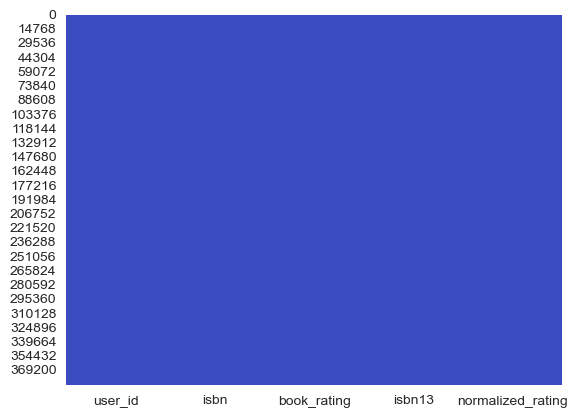

In [28]:
sns.heatmap(norm_ratings.isnull(), cbar = False, cmap='coolwarm')

### Top 20 __Countries__, __States__ and __Publisher__ in Dataset
For the normalization the top categories for countries, states and publishers are calculated.

In [29]:
get_top_publisher()

['harlequin',
 'silhouette',
 'pocket',
 'ballantine_books',
 'bantam_books',
 'scholastic',
 'simon_&amp;_schuster',
 'penguin_books',
 'berkley_publishing_group',
 'warner_books',
 'penguin_usa',
 'harpercollins',
 'fawcett_books',
 'signet_book',
 'random_house_inc',
 'st_martins_pr',
 "st._martin's_press",
 'tor_books',
 'harpercollins_publishers',
 'zebra_books',
 'other']

In [30]:
get_top_states()

['california',
 'n/a',
 'england',
 'ontario',
 'texas',
 'new_york',
 'florida',
 'pennsylvania',
 'illinois',
 'washington',
 'british_columbia',
 'ohio',
 'michigan',
 'oregon',
 'virginia',
 'massachusetts',
 'missouri',
 'nordrhein-westfalen',
 'north_carolina',
 '',
 'other']

In [31]:
# find out top countries
get_top_countries()

['usa',
 'canada',
 'united_kingdom',
 'germany',
 'spain',
 'australia',
 'italy',
 'france',
 'portugal',
 'new_zealand',
 'netherlands',
 'switzerland',
 'brazil',
 'china',
 'sweden',
 'india',
 'austria',
 'malaysia',
 'argentina',
 'singapore',
 'other']